___
# ENADE  - ADM
___

**CO_IES:**

1161 INSPER INSTITUTO DE ENSINO E PESQUISA - INSPER

**CO_CURSO:**

Código Curso Administracao Insper = 18278

link: http://emec.mec.gov.br/emec/consulta-cadastro/detalhes-ies/d96957f455f6405d14c6542552b0f6eb/MTE2MQ==

___

### Seaborn

links para estudo:

[https://seaborn.pydata.org/]

[https://seaborn.pydata.org/examples/index.html]

[https://www.kaggle.com/kanncaa1/seaborn-tutorial-for-beginners]

[https://www.datacamp.com/community/tutorials/seaborn-python-tutorial]



In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="ticks", color_codes=True)

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Kelly\Dropbox\Insper Aulas\DataScience\DS2019_1\Aulas\Aula26 - Incentivo Uso Seaborn


In [3]:
adm2 = pd.read_excel('adm2.xlsx')

In [4]:
adm2.head()

,NU_IDADE,TP_SEXO,NT_GER,NT_FG,NT_OBJ_FG,NT_DIS_FG,NT_CE,NT_OBJ_CE,NT_DIS_CE,CO_RS_I1,CO_RS_I2,CO_RS_I7
0,21,M,69.1,75.7,87.5,58.0,66.9,64,83.3,Médio,Médio,Não tive qualquer tipo de dificuldade para res...
1,22,F,67.5,80.5,87.5,70.0,63.1,64,58.3,Médio,Médio,Forma diferente de abordagem do conteúdo
2,21,M,60.0,66.6,75.0,54.0,57.8,60,45.0,Fácil,Fácil,Forma diferente de abordagem do conteúdo
3,21,F,66.4,61.7,62.5,60.5,68.0,68,68.3,Fácil,Fácil,Desconhecimento do conteúdo
4,23,F,70.1,83.1,87.5,76.5,65.8,68,53.3,Médio,Médio,Falta de motivação para fazer a prova


### Uso o arquivo `Dicionário de variáveis dos Microdados do Enade_Edição 2015.xlsx` para compreender o significado das variáveis acima.

Seguem algumas mais utilizadas nas análises feitas aqui:

    NT_GER - Nota bruta da prova - Média ponderada da formação geral (25%) e componente específico (75%). (valor de 0 a 100)
    NT_FG - Nota bruta na formação geral - Média ponderada da parte objetiva (60%) e discursiva (40%) na formação geral.(valor de 
    NT_CE - Nota bruta no componente específico - Média ponderada da parte objetiva (85%) e discursiva (15%) no componente específico. (valor de 0 a 100)


    CO_RS_I1 - Qual o grau de dificuldade desta prova na parte de Formação Geral?
    CO_RS_I2 - Qual o grau de dificuldade desta prova na parte de Componente Específico?
    CO_RS_I7 - Você se deparou com alguma dificuldade ao responder à prova. Qual?


In [5]:
adm2.CO_RS_I1 = pd.Categorical(adm2.CO_RS_I1,
                                 categories=['Muito fácil',
                                 'Fácil',
                                 'Médio',
                                 'Difícil',
                                 'Muito difícil',
                                 'Não respondeu'], ordered=True)

adm2.CO_RS_I2 = pd.Categorical(adm2.CO_RS_I2,
                                 categories=['Muito fácil',
                                 'Fácil',
                                 'Médio',
                                 'Difícil',
                                 'Muito difícil',
                                 'Não respondeu'], ordered=True)

adm2.CO_RS_I7 = pd.Categorical(adm2.CO_RS_I7,
                                 categories=['Desconhecimento do conteúdo',
                                 'Forma diferente de abordagem do conteúdo',
                                 'Espaço insuficiente para responder às questões',
                                 'Falta de motivação para fazer a prova',
                                 'Não tive qualquer tipo de dificuldade para responder à prova',
                                 'Resposta anulada',
                                 'Não respondeu'], ordered=True)


___
## Considerando a distribuição das frequências nas categorias da pergunta CO_RS_I7 

In [6]:
#CO_RS_I7 - Você se deparou com alguma dificuldade ao responder à prova. Qual?
adm2.CO_RS_I7.value_counts(True)*100

Falta de motivação para fazer a prova                           39.688716
Forma diferente de abordagem do conteúdo                        24.124514
Não tive qualquer tipo de dificuldade para responder à prova    23.346304
Espaço insuficiente para responder às questões                   5.836576
Desconhecimento do conteúdo                                      4.280156
Não respondeu                                                    2.334630
Resposta anulada                                                 0.389105
Name: CO_RS_I7, dtype: float64

___
## Opções gráficas quando há uma variável quantativa versus uma variável qualitativa

### Via opção de Catplot

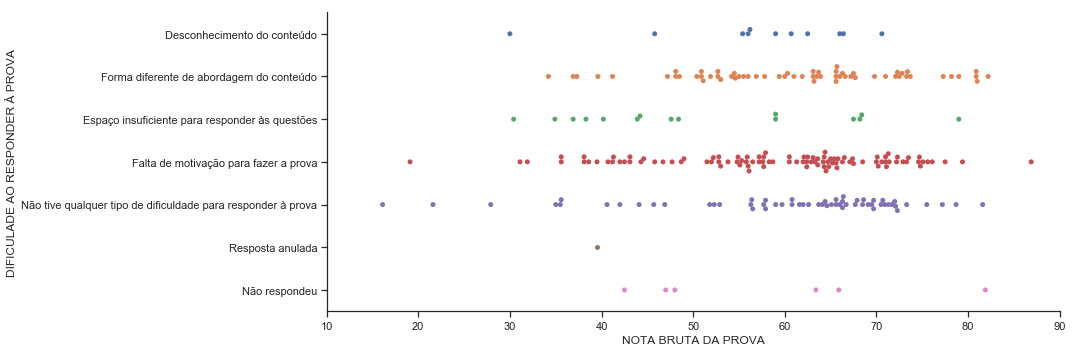

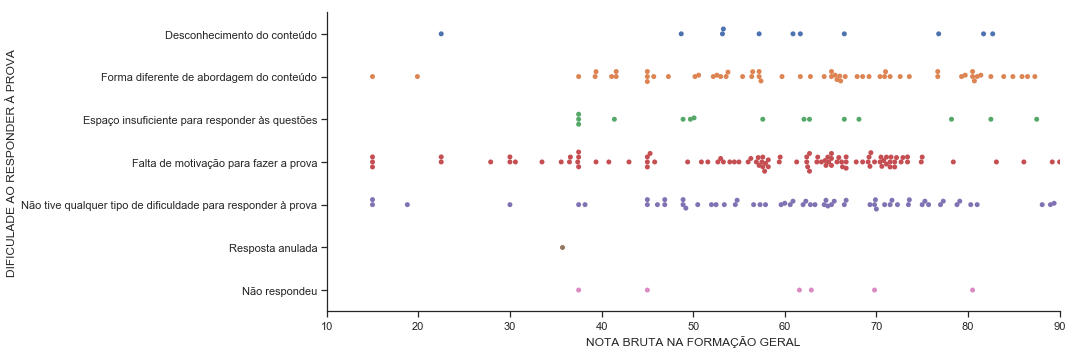

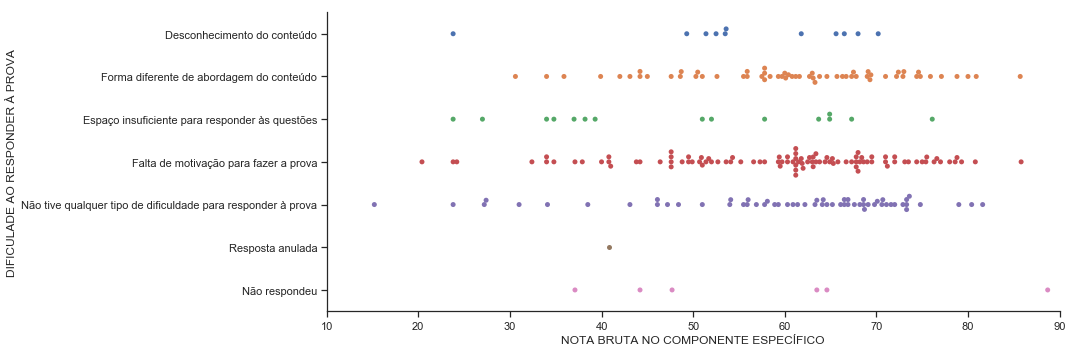

In [7]:
#CO_RS_I7 - Você se deparou com alguma dificuldade ao responder à prova. Qual?
#NT_GER - Nota bruta da prova - Média ponderada da formação geral (25%) e componente específico (75%). (valor de 0 a 100)
g=sns.catplot(y="CO_RS_I7", x="NT_GER", kind='swarm', data=adm2, height=5, aspect=3);
g.set_axis_labels("NOTA BRUTA DA PROVA", "DIFICULADE AO RESPONDER À PROVA")
g.set(xlim=(10, 90))
g.despine(trim=False);


#CO_RS_I7 - Você se deparou com alguma dificuldade ao responder à prova. Qual?
#NT_FG - Nota bruta na formação geral - Média ponderada da parte objetiva (60%) e discursiva (40%) na formação geral.(valor de 0 a 100)
g=sns.catplot(y="CO_RS_I7", x="NT_FG", kind='swarm', data=adm2, height=5, aspect=3);
g.set_axis_labels("NOTA BRUTA NA FORMAÇÃO GERAL", "DIFICULADE AO RESPONDER À PROVA")
g.set(xlim=(10, 90))
g.despine(trim=False);


#CO_RS_I7 - Você se deparou com alguma dificuldade ao responder à prova. Qual?
#NT_CE - Nota bruta no componente específico - Média ponderada da parte objetiva (85%) e discursiva (15%) no componente específico. (valor de 0 a 100)
g=sns.catplot(y="CO_RS_I7", x="NT_CE", kind='swarm', data=adm2, height=5, aspect=3);
g.set_axis_labels("NOTA BRUTA NO COMPONENTE ESPECÍFICO", "DIFICULADE AO RESPONDER À PROVA")
g.set(xlim=(10, 90))
g.despine(trim=False);


### Via opção de Boxplot

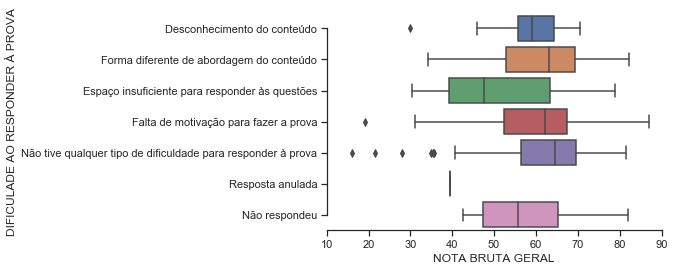

In [8]:
#CO_RS_I7 - Você se deparou com alguma dificuldade ao responder à prova. Qual?
#NT_GER - Nota bruta da prova - Média ponderada da formação geral (25%) e componente específico (75%). (valor de 0 a 100)
g=sns.boxplot(y="CO_RS_I7", x="NT_GER", data=adm2);
g.set(xlabel="NOTA BRUTA GERAL", ylabel="DIFICULADE AO RESPONDER À PROVA")
g.set(xlim=(10, 90))
sns.despine(trim=True);

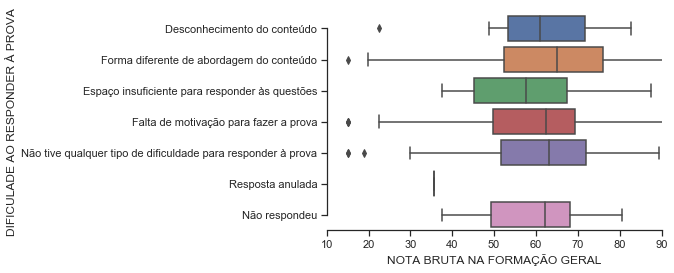

In [9]:
#CO_RS_I7 - Você se deparou com alguma dificuldade ao responder à prova. Qual?
#NT_FG - Nota bruta na formação geral - Média ponderada da parte objetiva (60%) e discursiva (40%) na formação geral.(valor de 0 a 100)
g=sns.boxplot(y="CO_RS_I7", x="NT_FG", data=adm2);
g.set(xlabel="NOTA BRUTA NA FORMAÇÃO GERAL", ylabel="DIFICULADE AO RESPONDER À PROVA")
g.set(xlim=(10, 90))
sns.despine(trim=True);

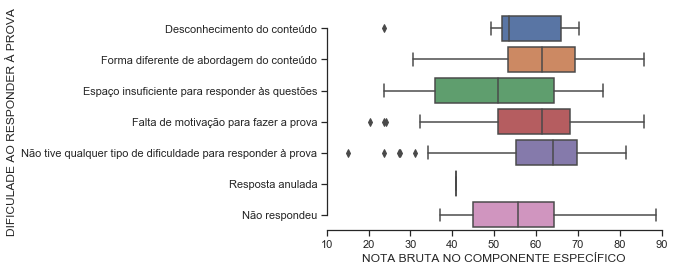

In [10]:
#CO_RS_I7 - Você se deparou com alguma dificuldade ao responder à prova. Qual?
#NT_CE - Nota bruta no componente específico - Média ponderada da parte objetiva (85%) e discursiva (15%) no componente específico. (valor de 0 a 100)
g=sns.boxplot(y="CO_RS_I7", x="NT_CE", data=adm2);
g.set(xlabel="NOTA BRUTA NO COMPONENTE ESPECÍFICO", ylabel="DIFICULADE AO RESPONDER À PROVA")
g.set(xlim=(10, 90))
sns.despine(trim=True);

___
## Opções gráficas quando há cruzamento de DUAS variáveis quantitativas que pode ser segundo níveis de uma terceira variável qualitativa

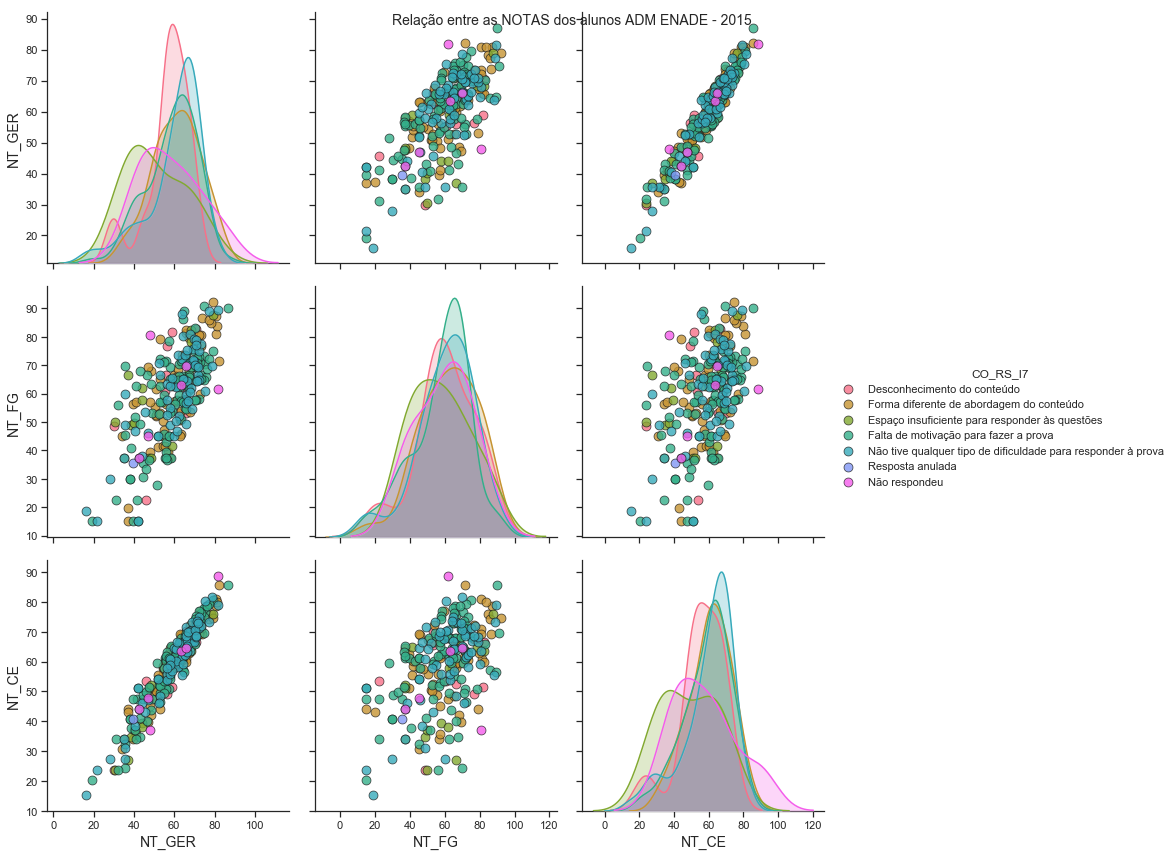

In [15]:
sns.pairplot(adm2[['NT_GER','NT_FG','NT_CE','CO_RS_I7']], hue='CO_RS_I7', palette='husl',
            plot_kws = {'alpha': 0.8, 's': 80, 'edgecolor': 'k'}, height = 4)
sns.set_context(rc={"axes.labelsize":14})
plt.suptitle('Relação entre as NOTAS dos alunos ADM ENADE - 2015', size = 14);


___
## Opções gráficas quando há cruzamento de DUAS variáveis qualitativas

### Via opção de TABELA 

In [12]:
print('Concordância Dificuldade Formação Geral e Componente Especfífico:')
pd.crosstab(adm2.CO_RS_I1,adm2.CO_RS_I2,rownames=['FORMAÇÃO GERAL'], colnames=['ESPECÍFICO'], normalize=True)

Concordância Dificuldade Formação Geral e Componente Especfífico:


ESPECÍFICO,Muito fácil,Fácil,Médio,Difícil,Muito difícil,Não respondeu
FORMAÇÃO GERAL,,,,,,
Muito fácil,0.042802,0.011673,0.007782,0.000000,0.000000,0.000000
Fácil,0.019455,0.155642,0.085603,0.000000,0.003891,0.000000
Médio,0.000000,0.073930,0.486381,0.027237,0.000000,0.000000
Difícil,0.000000,0.000000,0.027237,0.019455,0.000000,0.000000
Muito difícil,0.000000,0.000000,0.000000,0.003891,0.007782,0.000000
Não respondeu,0.000000,0.000000,0.000000,0.000000,0.000000,0.027237


In [13]:
print('Concordância Dificuldade PROVA e Formação Geral:')
pd.crosstab(adm2.CO_RS_I7,adm2.CO_RS_I1,rownames=['DIFICULDADE PROVA'], colnames=['FORMAÇÃO GERAL'], normalize=True)

Concordância Dificuldade PROVA e Formação Geral:


FORMAÇÃO GERAL,Muito fácil,Fácil,Médio,Difícil,Muito difícil,Não respondeu
DIFICULDADE PROVA,,,,,,
Desconhecimento do conteúdo,0.003891,0.011673,0.019455,0.003891,0.003891,0.000000
Forma diferente de abordagem do conteúdo,0.000000,0.058366,0.167315,0.015564,0.000000,0.000000
Espaço insuficiente para responder às questões,0.003891,0.019455,0.035019,0.000000,0.000000,0.000000
Falta de motivação para fazer a prova,0.027237,0.105058,0.237354,0.015564,0.007782,0.003891
Não tive qualquer tipo de dificuldade para responder à prova,0.027237,0.070039,0.124514,0.011673,0.000000,0.000000
Resposta anulada,0.000000,0.000000,0.003891,0.000000,0.000000,0.000000
Não respondeu,0.000000,0.000000,0.000000,0.000000,0.000000,0.023346


In [14]:
print('Concordância Dificuldade PROVA e Componente Específico:')
pd.crosstab(adm2.CO_RS_I7,adm2.CO_RS_I2,rownames=['DIFICULDADE PROVA'], colnames=['ESPECÍFICO'], normalize=True)

Concordância Dificuldade PROVA e Componente Específico:


ESPECÍFICO,Muito fácil,Fácil,Médio,Difícil,Muito difícil,Não respondeu
DIFICULDADE PROVA,,,,,,
Desconhecimento do conteúdo,0.003891,0.003891,0.027237,0.007782,0.000000,0.000000
Forma diferente de abordagem do conteúdo,0.003891,0.058366,0.151751,0.023346,0.003891,0.000000
Espaço insuficiente para responder às questões,0.003891,0.023346,0.031128,0.000000,0.000000,0.000000
Falta de motivação para fazer a prova,0.027237,0.093385,0.252918,0.011673,0.007782,0.003891
Não tive qualquer tipo de dificuldade para responder à prova,0.023346,0.062257,0.140078,0.007782,0.000000,0.000000
Resposta anulada,0.000000,0.000000,0.003891,0.000000,0.000000,0.000000
Não respondeu,0.000000,0.000000,0.000000,0.000000,0.000000,0.023346
